# Week2授業課題2 富士下山問題

In [2]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

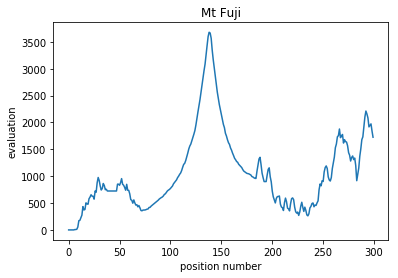

In [3]:
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation")
plt.plot(fuji[:,0], fuji[:,3])

## 【問題2】ある地点の勾配を計算する関数を作成¶
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

勾配　＝　yの変化量（標高）　/ xの変化量（その地点での番号）

In [4]:
def get_slope(x):
    x_diff = x - (x-1)
    y_diff = fuji[x,3] - fuji[x-1, 3]
    slope = y_diff / x_diff
    return slope

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。 α は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

実装上の注意

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [5]:
def move_position(x, alpha):
    moved_position = int((x - alpha*get_slope(x)).round())
    if fuji[:,0][0] < moved_position < fuji[:,0][-1]:
                      return moved_position
    else:
        return x

## 【問題4】山を下る関数を作成¶
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

実装上の注意

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [6]:
def down_mt(x, alpha):
    i = 0
    point_list = [x]
    while point_list[i] != move_position(point_list[i], alpha) and i<100:
        point_list.append(move_position(point_list[i], alpha))
        i += 1
    return point_list

In [7]:
down_mt(136, 0.2)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

## 【問題5】下山過程の可視化¶
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


In [9]:
def graph(start, alpha):
    plt.title("Mt fuji")
    plt.xlabel("position")
    plt.ylabel("evaluation")
    plt.plot(fuji[:,0], fuji[:,3])

    position_move = down_mt(start, alpha)
    position_move_eva = fuji[position_move,3]
    plt.scatter(position_move, position_move_eva, color="red")

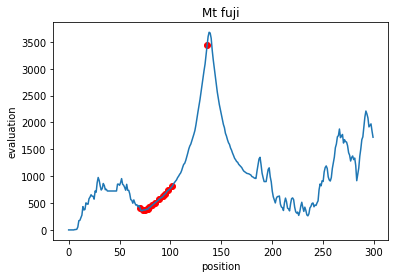

In [10]:
graph(136, 0.2)

## 【問題6】初期値の変更¶
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

初期値とは

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [12]:
def make_all_posi(alpha):
    all_posi = []
    for i in range(300):
        all_posi.append(down_mt(i, alpha))
    return all_posi

In [13]:
make_all_posi(0.2)

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 5],
 [7],
 [8, 7],
 [9, 1],
 [10],
 [11, 10],
 [12, 2],
 [13, 4],
 [14],
 [15, 27, 31, 51, 41],
 [16, 14],
 [17],
 [18, 22, 13, 4],
 [19, 21, 15, 27, 31, 51, 41],
 [20],
 [21, 15, 27, 31, 51, 41],
 [22, 13, 4],
 [23, 28],
 [24],
 [25, 36, 52, 37, 35, 43],
 [26],
 [27, 31, 51, 41],
 [28],
 [29, 10],
 [30, 41],
 [31, 51, 41],
 [32, 47],
 [33, 27, 31, 51, 41],
 [34, 15, 27, 31, 51, 41],
 [35, 43],
 [36, 52, 37, 35, 43],
 [37, 35, 43],
 [38, 44],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48, 22, 13, 4],
 [49],
 [50, 54, 58, 80],
 [51, 41],
 [52, 37, 35, 43],
 [53, 74],
 [54, 58, 80],
 [55, 63, 74],
 [56, 66, 74],
 [57, 35, 43],
 [58, 80],
 [59],
 [60, 73, 70, 78, 77, 75],
 [61, 83, 80],
 [62, 64, 52, 37, 35, 43],
 [63, 74],
 [64, 52, 37, 35, 43],
 [65, 76, 75],
 [66, 74],
 [67, 66, 74],
 [68, 76, 75],
 [69, 64, 52, 37, 35, 43],
 [70, 78, 77, 75],
 [71, 81, 77, 75],
 [72, 73, 70, 78, 77, 75],
 [73, 70, 78, 77, 75],
 [74],
 [75]

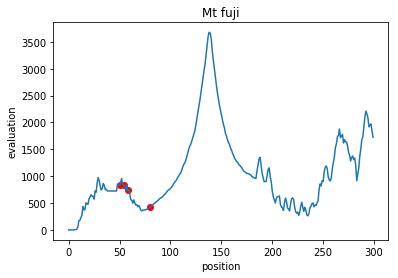

In [17]:
#50からスタート
graph(50, 0.2)

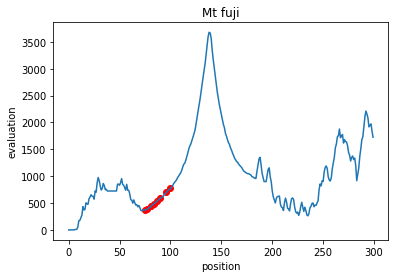

In [14]:
#100からスタート
graph(100, 0.2)

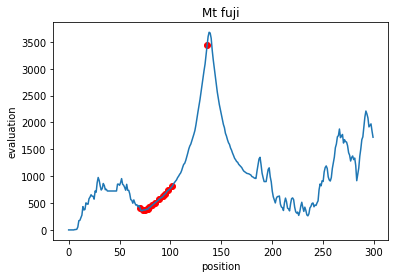

In [25]:
#136からスタート
graph(136, 0.2)

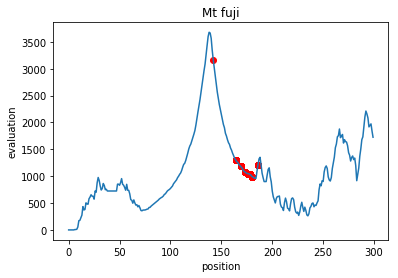

In [26]:
#142からスタート
graph(142, 0.2)

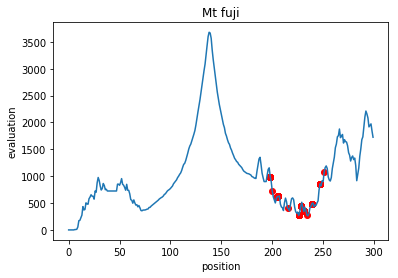

In [15]:
#200からスタート
graph(200, 0.2)

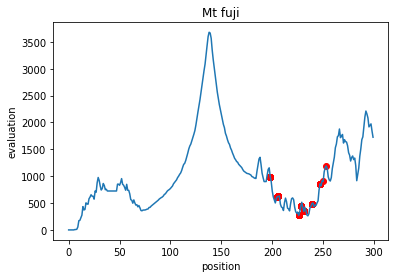

In [18]:
#250からスタート
graph(250, 0.2)

## 【問題7】（アドバンス問題）ハイパーパラメータの変更¶
ハイパーパラメータ α を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

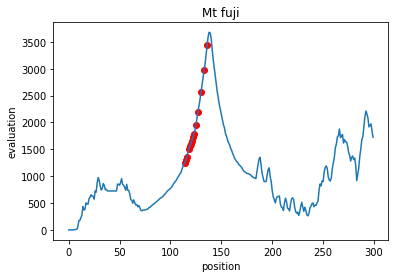

In [24]:
#パラメータ　0.02
graph(136, 0.02)

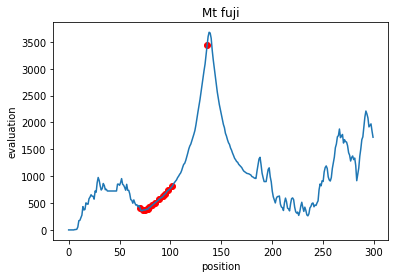

In [19]:
#パラメータ　0.2
graph(136, 0.2)

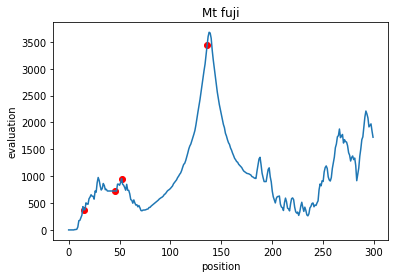

In [20]:
#パラメータ　0.5
graph(136, 0.5)

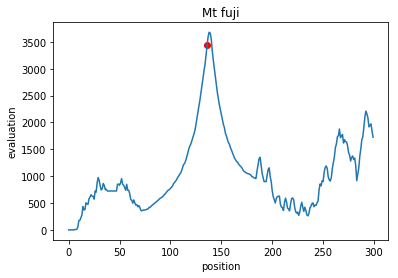

In [21]:
#パラメータ　1
graph(136, 1)